In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

In [11]:
df_mask = pd.read_csv("../A4-common analysis/Dataset/mask compliance survey.csv")

In [7]:
df_mask.head(5)

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,1001,0.053,0.074,0.134,0.295,0.444
1,1003,0.083,0.059,0.098,0.323,0.436
2,1005,0.067,0.121,0.120,0.201,0.491
3,1007,0.020,0.034,0.096,0.278,0.572
4,1009,0.053,0.114,0.180,0.194,0.459


In [8]:
df_case = pd.read_csv("../A4-common analysis/Dataset/RAW_us_confirmed_cases.csv")

In [9]:
df_case.head(5)

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,...,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21
0,Alabama,Autauga,84001001,US,USA,840,1001.0,US,32.539527,-86.644082,...,9967,10043,10047,10048,10061,10083,10219,10228,10239,10252
1,Alabama,Baldwin,84001003,US,USA,840,1003.0,US,30.727750,-87.722071,...,37224,37245,37258,37266,37285,37325,37350,37372,37398,37414
2,Alabama,Barbour,84001005,US,USA,840,1005.0,US,31.868263,-85.387129,...,3575,3577,3578,3578,3583,3595,3596,3596,3599,3601
3,Alabama,Bibb,84001007,US,USA,840,1007.0,US,32.996421,-87.125115,...,4246,4251,4252,4253,4256,4262,4275,4276,4278,4279
4,Alabama,Blount,84001009,US,USA,840,1009.0,US,33.982109,-86.567906,...,10179,10192,10197,10207,10227,10338,10364,10371,10395,10406


In [9]:
df_policy = pd.read_csv("../A4-common analysis/Dataset/U.S._State_and_Territorial_Public_Mask_Mandates_From_April_10__2020_through_August_15__2021_by_County_by_Day.csv")

In [17]:
df_policy.head()

,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
0,AL,Autauga County,1,1,4/10/2020,2,NaN,NaN,NaN,NaN
1,AL,Autauga County,1,1,4/11/2020,2,NaN,NaN,NaN,NaN
2,AL,Autauga County,1,1,4/12/2020,2,NaN,NaN,NaN,NaN
3,AL,Autauga County,1,1,4/13/2020,2,NaN,NaN,NaN,NaN
4,AL,Autauga County,1,1,4/14/2020,2,NaN,NaN,NaN,NaN


In [37]:
County = "Pima"
state = "Arizona"
state_abb= "AZ"
FIPS_pima = 4019
FIPS_Wright =29229

In [13]:
df_case_pima = df_case[(df_case['Admin2'] =='Pima') & (df_case['Province_State'] =='Arizona')].reset_index(drop=True)
df_case_pima

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,...,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21
0,Arizona,Pima,84004019,US,USA,840,4019.0,US,32.097133,-111.789003,...,141181,141688,141869,141870,141921,142863,143208,143800,144130,144615


In [18]:
df_policy_pima = df_policy[df_policy['County_Name'] == 'Pima County'].reset_index(drop =True)
df_policy_pima.head()

,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
0,AZ,Pima County,4,19,4/10/2020,2,NaN,NaN,NaN,NaN
1,AZ,Pima County,4,19,4/11/2020,2,NaN,NaN,NaN,NaN
2,AZ,Pima County,4,19,4/12/2020,2,NaN,NaN,NaN,NaN
3,AZ,Pima County,4,19,4/13/2020,2,NaN,NaN,NaN,NaN
4,AZ,Pima County,4,19,4/14/2020,2,NaN,NaN,NaN,NaN


In [19]:
df_mask_pima = df_mask[df_mask['COUNTYFP'] == FIPS_pima].reset_index(drop=True)
df_mask_pima.head()

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,4019,0.023,0.024,0.073,0.121,0.759


In [20]:
id_vars = [
    'Province_State',
    'Admin2',
    'UID',
    'iso2',
    'iso3',
    'code3',
    'FIPS',
    'Country_Region',
    'Lat',
    'Long_',
    'Combined_Key'
]

In [21]:
df_case_pima_melt =pd.melt(df_case_pima, id_vars = id_vars, var_name ='Date', value_name = "Confirmed_Cases")
df_case_pima_melt.head()

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed_Cases
0,Arizona,Pima,84004019,US,USA,840,4019.0,US,32.097133,-111.789003,"Pima, Arizona, US",1/22/20,0
1,Arizona,Pima,84004019,US,USA,840,4019.0,US,32.097133,-111.789003,"Pima, Arizona, US",1/23/20,0
2,Arizona,Pima,84004019,US,USA,840,4019.0,US,32.097133,-111.789003,"Pima, Arizona, US",1/24/20,0
3,Arizona,Pima,84004019,US,USA,840,4019.0,US,32.097133,-111.789003,"Pima, Arizona, US",1/25/20,0
4,Arizona,Pima,84004019,US,USA,840,4019.0,US,32.097133,-111.789003,"Pima, Arizona, US",1/26/20,0


In [22]:
df_case_pima_melt['Date'] = pd.to_datetime(df_case_pima_melt['Date'])
df_policy_pima['date'] = pd.to_datetime(df_policy_pima['date'])

In [24]:
df_case_policy_pima = df_case_pima_melt.merge(df_policy_pima, left_on='Date', right_on='date', how='outer')
df_case_policy_pima.head()

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,...,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
0,Arizona,Pima,84004019,US,USA,840,4019.0,US,32.097133,-111.789003,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
1,Arizona,Pima,84004019,US,USA,840,4019.0,US,32.097133,-111.789003,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
2,Arizona,Pima,84004019,US,USA,840,4019.0,US,32.097133,-111.789003,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
3,Arizona,Pima,84004019,US,USA,840,4019.0,US,32.097133,-111.789003,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
4,Arizona,Pima,84004019,US,USA,840,4019.0,US,32.097133,-111.789003,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


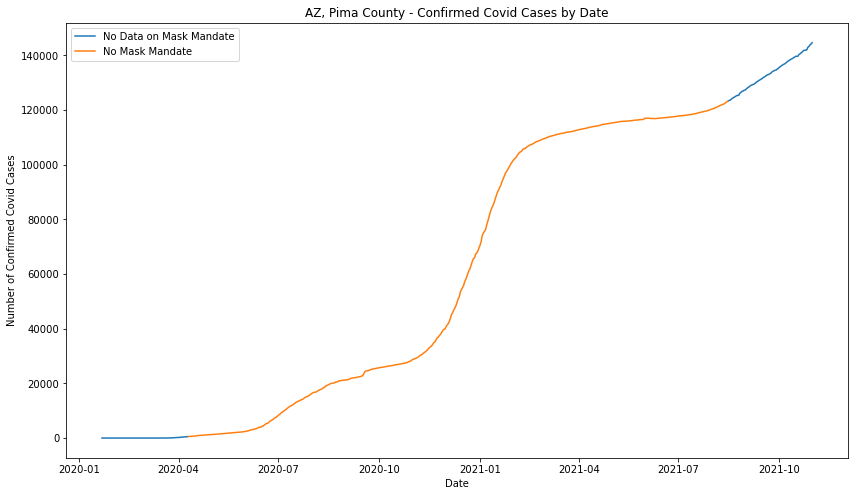

In [25]:
fig, ax = plt.subplots(figsize=(14,8))
ax.plot(df_case_policy_pima['Date'][:79], df_case_policy_pima['Confirmed_Cases'][:79], color='C0')
ax.plot(df_case_policy_pima['Date'][79:572], df_case_policy_pima['Confirmed_Cases'][79:572], color='C1')
ax.plot(df_case_policy_pima['Date'][572:], df_case_policy_pima['Confirmed_Cases'][572:], color='C0')

line1 = Line2D([0], [0], label='No Mask Mandate', color='C1')
line0 = Line2D([0], [0], label='No Data on Mask Mandate', color='C0')

plt.legend(handles=[line0,line1])
ax.set_title("AZ, Pima County - Confirmed Covid Cases by Date")
ax.set_xlabel("Date")
ax.set_ylabel("Number of Confirmed Covid Cases")

plt.show()

In [26]:
df_case_policy_pima['New_Cases'] = df_case_policy_pima['Confirmed_Cases'].diff()
df_case_policy_pima.head()

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,...,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation,New_Cases
0,Arizona,Pima,84004019,US,USA,840,4019.0,US,32.097133,-111.789003,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1,Arizona,Pima,84004019,US,USA,840,4019.0,US,32.097133,-111.789003,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,0.0
2,Arizona,Pima,84004019,US,USA,840,4019.0,US,32.097133,-111.789003,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,0.0
3,Arizona,Pima,84004019,US,USA,840,4019.0,US,32.097133,-111.789003,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,0.0
4,Arizona,Pima,84004019,US,USA,840,4019.0,US,32.097133,-111.789003,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,0.0


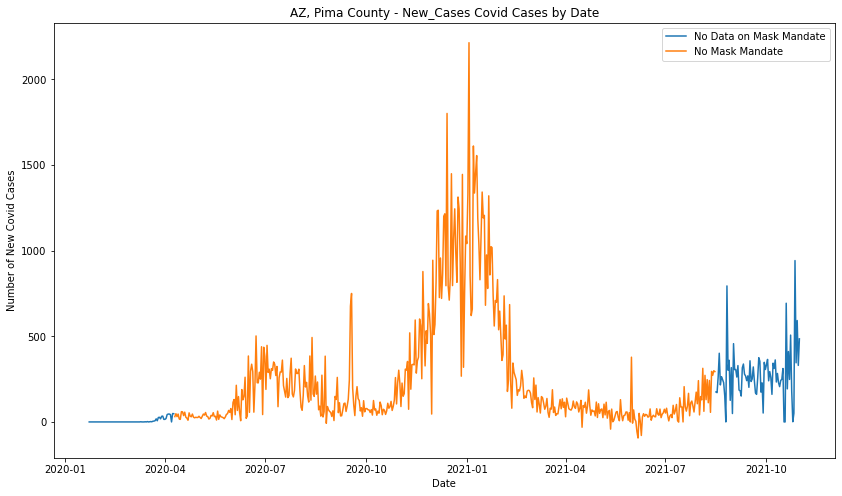

In [30]:
fig, ax = plt.subplots(figsize=(14,8))
ax.plot(df_case_policy_pima['Date'][:79], df_case_policy_pima['New_Cases'][:79], color='C0')
ax.plot(df_case_policy_pima['Date'][79:572], df_case_policy_pima['New_Cases'][79:572], color='C1')
ax.plot(df_case_policy_pima['Date'][572:], df_case_policy_pima['New_Cases'][572:], color='C0')

line1 = Line2D([0], [0], label='No Mask Mandate', color='C1')
line0 = Line2D([0], [0], label='No Data on Mask Mandate', color='C0')

plt.legend(handles=[line0,line1])
ax.set_title("AZ, Pima County - New_Cases Covid Cases by Date")
ax.set_xlabel("Date")
ax.set_ylabel("Number of New Covid Cases")

plt.show()

In [28]:
df_case_policy_pima['Moving_Average_New_Cases'] = df_case_policy_pima['New_Cases'].rolling(window=7).mean()
df_case_policy_pima.head()

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,...,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation,New_Cases,Moving_Average_New_Cases
0,Arizona,Pima,84004019,US,USA,840,4019.0,US,32.097133,-111.789003,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arizona,Pima,84004019,US,USA,840,4019.0,US,32.097133,-111.789003,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,Arizona,Pima,84004019,US,USA,840,4019.0,US,32.097133,-111.789003,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,0.0,NaN
3,Arizona,Pima,84004019,US,USA,840,4019.0,US,32.097133,-111.789003,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,Arizona,Pima,84004019,US,USA,840,4019.0,US,32.097133,-111.789003,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,0.0,NaN


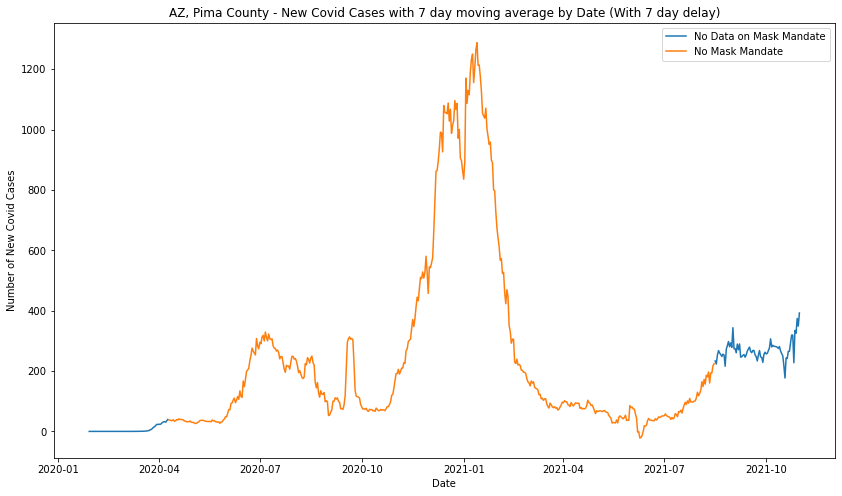

In [31]:
fig, ax = plt.subplots(figsize=(14,8))
ax.plot(df_case_policy_pima['Date'][:79], df_case_policy_pima['Moving_Average_New_Cases'][:79], color='C0')
ax.plot(df_case_policy_pima['Date'][79:572], df_case_policy_pima['Moving_Average_New_Cases'][79:572], color='C1')
ax.plot(df_case_policy_pima['Date'][572:], df_case_policy_pima['Moving_Average_New_Cases'][572:], color='C0')

line1 = Line2D([0], [0], label='No Mask Mandate', color='C1')
line0 = Line2D([0], [0], label='No Data on Mask Mandate', color='C0')

plt.legend(handles=[line0,line1])
ax.set_title("AZ, Pima County - New Covid Cases with 7 day moving average by Date (With 7 day delay)")
ax.set_xlabel("Date")
ax.set_ylabel("Number of New Covid Cases")

plt.show()

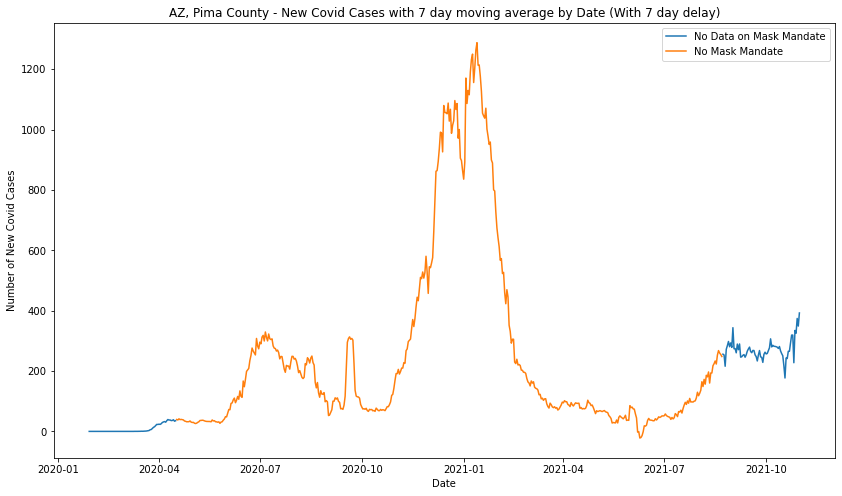

In [32]:
delay = 7

fig, ax = plt.subplots(figsize=(14,8))
ax.plot(df_case_policy_pima['Date'][:79+delay], df_case_policy_pima['Moving_Average_New_Cases'][:79+delay], color='C0')
ax.plot(df_case_policy_pima['Date'][79+delay:572+delay], df_case_policy_pima['Moving_Average_New_Cases'][79+delay:572+delay], color='C1')
ax.plot(df_case_policy_pima['Date'][572+delay:], df_case_policy_pima['Moving_Average_New_Cases'][572+delay:], color='C0')

line1 = Line2D([0], [0], label='No Mask Mandate', color='C1')
line0 = Line2D([0], [0], label='No Data on Mask Mandate', color='C0')

plt.legend(handles=[line0,line1])
ax.set_title("AZ, Pima County - New Covid Cases with 7 day moving average by Date (With 7 day delay)")
ax.set_xlabel("Date")
ax.set_ylabel("Number of New Covid Cases")

plt.show()

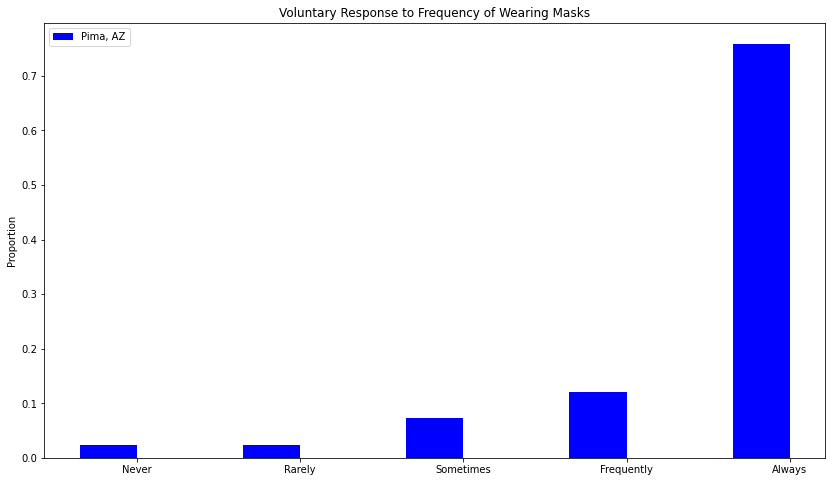

In [36]:
pima = [0.023, 0.024, 0.073, 0.121, 0.759]

ind = np.arange(5)
width =0.35

fig, ax = plt.subplots(figsize=(14,8))
recte1 = ax.bar(ind, pima, width, color  ='b')

ax.set_ylabel('Proportion')
ax.set_title('Voluntary Response to Frequency of Wearing Masks')
ax.set_xticks(ind + width/2)
ax.set_xticklabels(('Never', 'Rarely', 'Sometimes', 'Frequently', 'Always'))

ax.legend([recte1], ['Pima, AZ'])

In [38]:
df_mask_wright = df_mask[df_mask['COUNTYFP'] == FIPS_Wright].reset_index(drop=True)
df_mask_wright.head()

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,29229,0.419,0.139,0.187,0.1,0.155


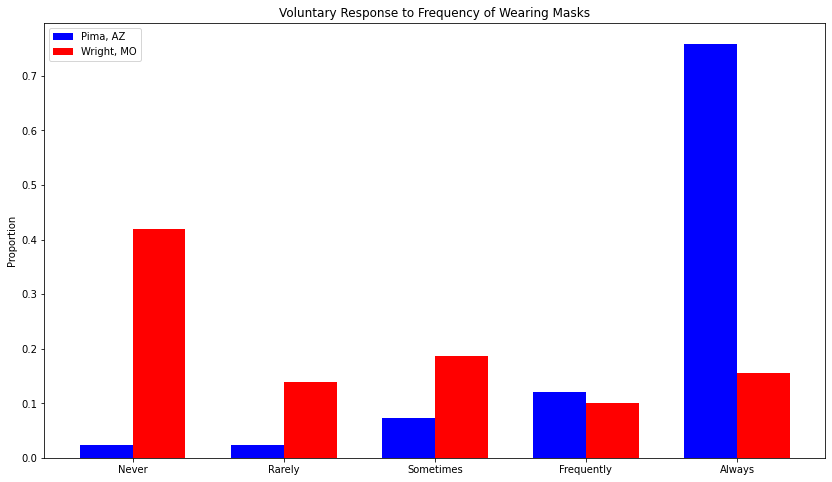

In [40]:
pima = [0.023, 0.024, 0.073, 0.121, 0.759]
wright =[0.419, 0.139, 0.187, 0.1, 0.155]

ind = np.arange(5)
width =0.35

fig, ax = plt.subplots(figsize=(14,8))
recte1 = ax.bar(ind, pima, width, color  ='b')
recte2 = ax.bar(ind+width, wright, width, color  ='r')

ax.set_ylabel('Proportion')
ax.set_title('Voluntary Response to Frequency of Wearing Masks')
ax.set_xticks(ind + width/2)
ax.set_xticklabels(('Never', 'Rarely', 'Sometimes', 'Frequently', 'Always'))

ax.legend([recte1, recte2 ], ['Pima, AZ', 'Wright, MO'])